# This notebook just loads the saved model

In [12]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

from model import Model
from layers.fullyconnected import FC
from activations import Sigmoid, ReLU, Tanh, LinearActivation
from optimizers.gradientdescent import GD
from optimizers.adam import Adam
from losses.binarycrossentropy import BinaryCrossEntropy
from losses.meansquarederror import MeanSquaredError

TRAINING_DATA_PATH = "./datasets/california_houses_price/california_housing_train.csv"
TEST_DATA_PATH = "./datasets/california_houses_price/california_housing_test.csv"


data = pd.read_csv(TRAINING_DATA_PATH)
X, Y = np.array(data[data.columns[0:-1]]).T, np.array(data[data.columns[-1]]).reshape(1,-1)

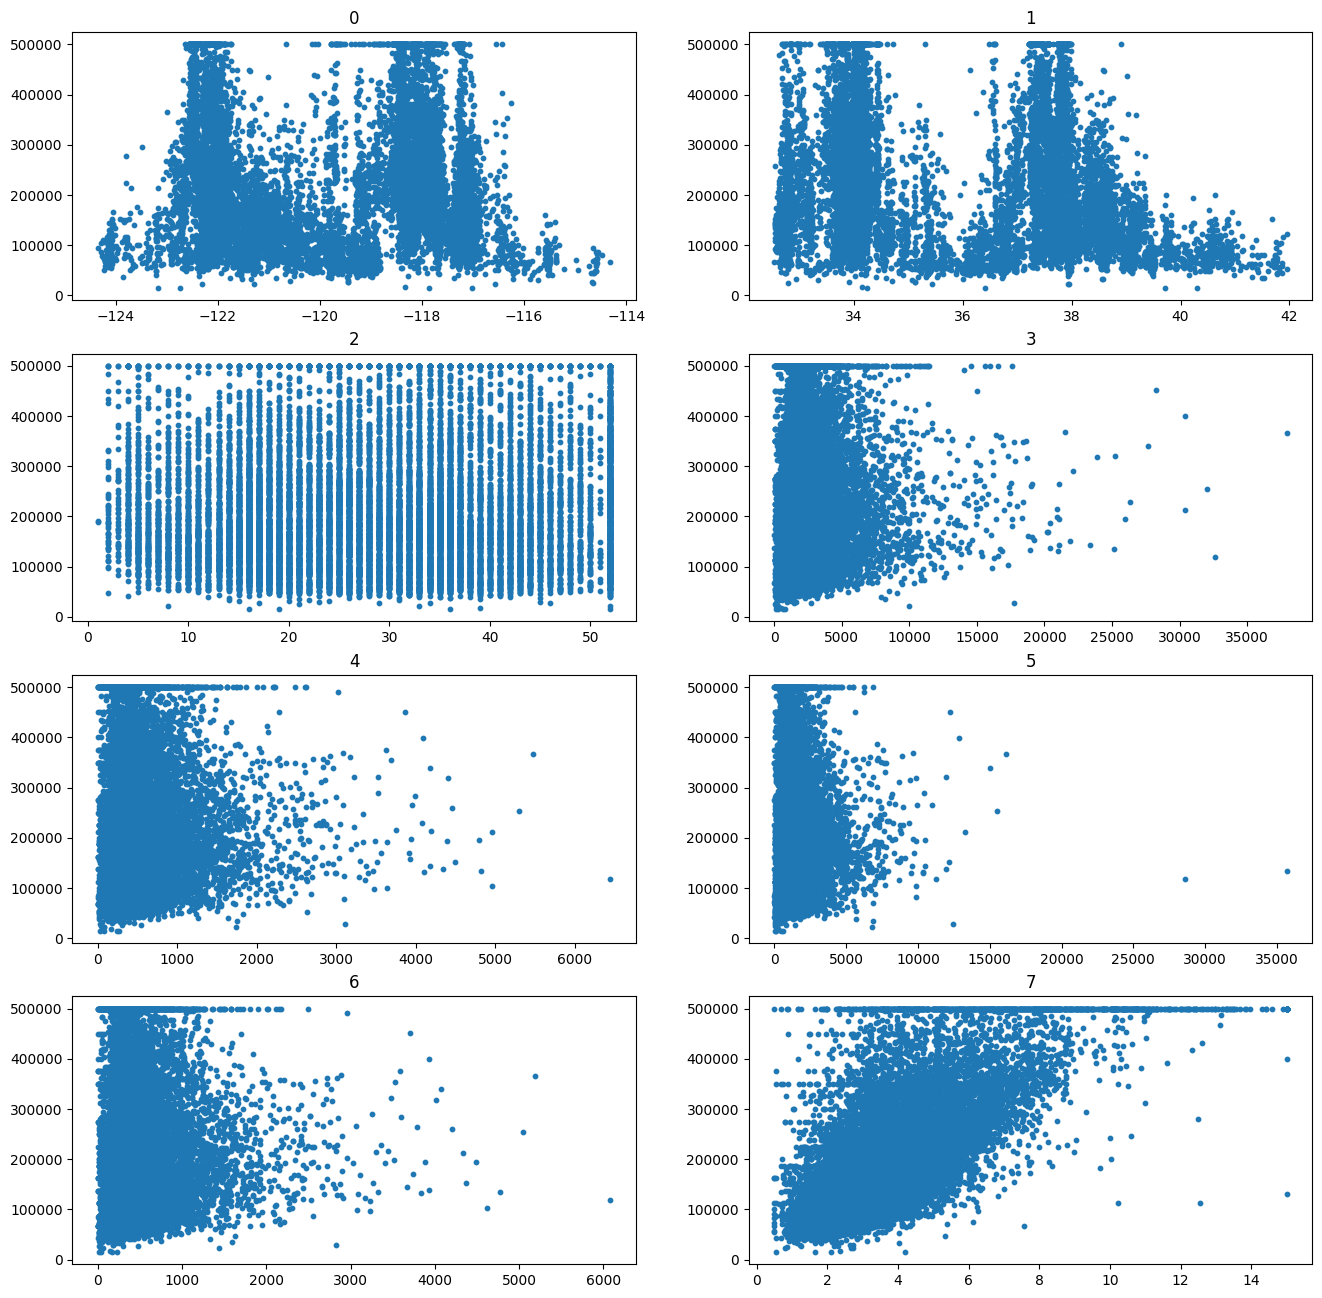

In [13]:
order = list(range(data.shape[0]))
np.random.shuffle(order)
fig, ax = plt.subplots(4, 2, figsize=(16, 16))
sn = 0
for j in range(4):
    for i in range(2):
        ax[j, i].scatter(x = X[sn][order], y = Y[:,order].flatten(), s=10)
        ax[j, i].set_title(f"{sn}")
        sn += 1
plt.show()

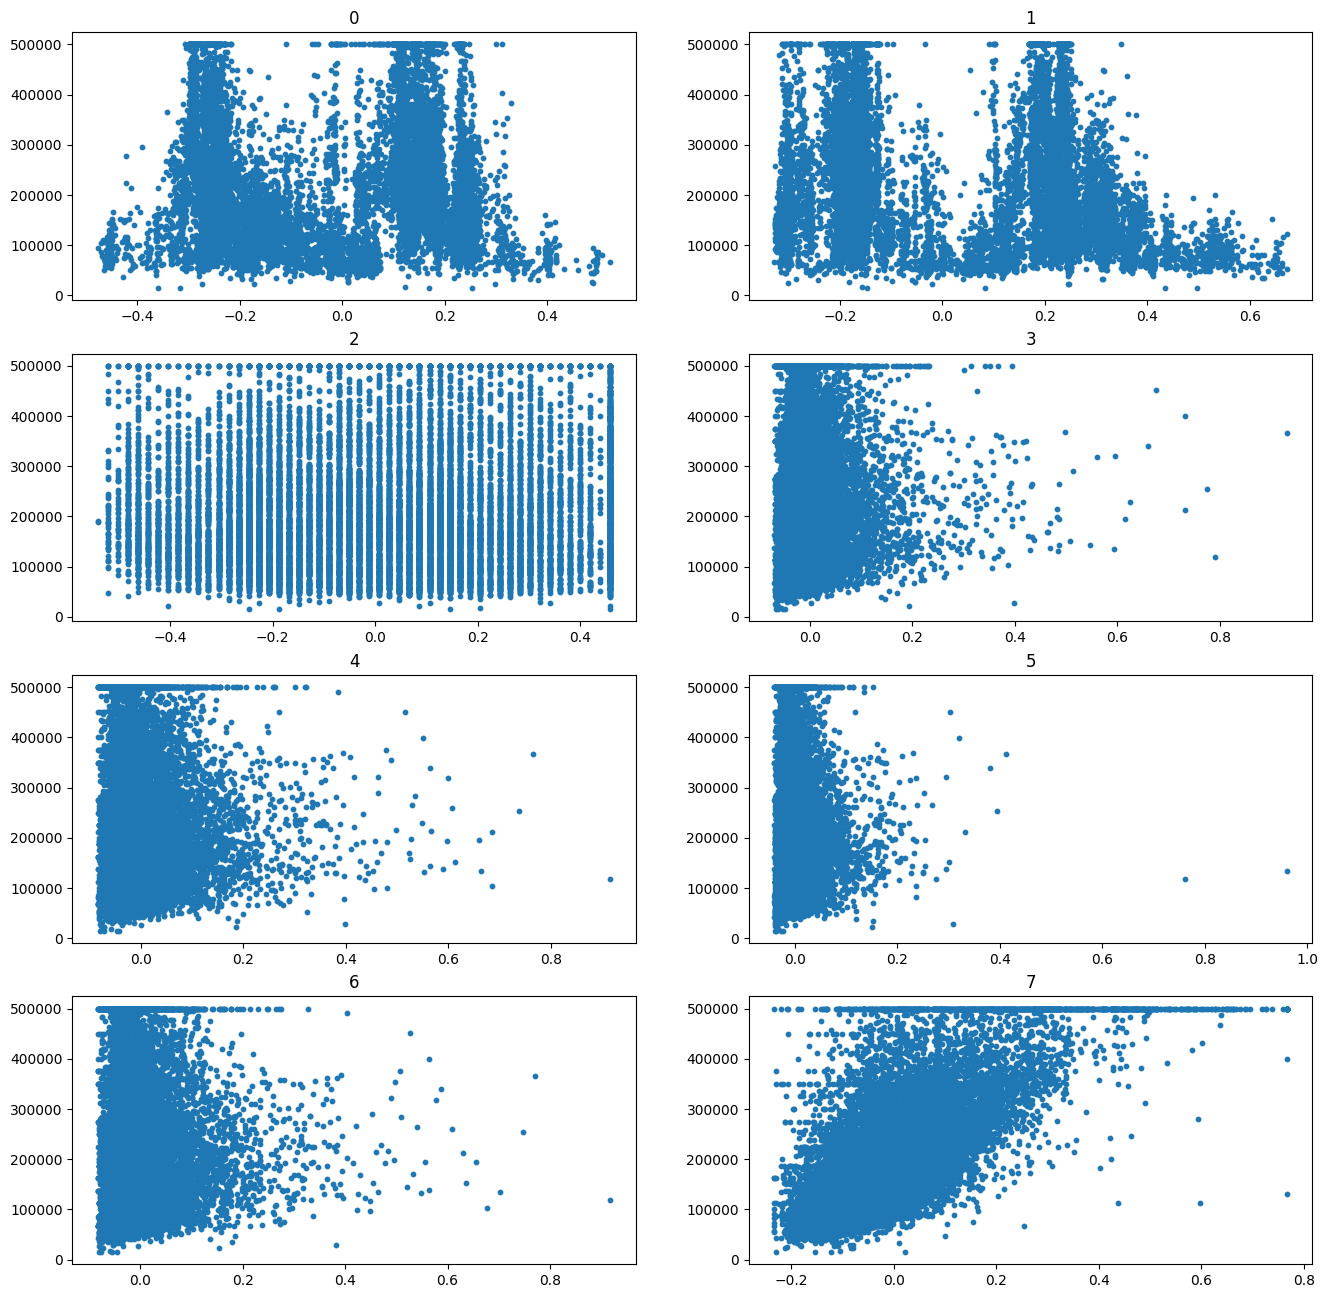

In [14]:
# normaliziedX = np.array([(x-np.mean(x))/(np.std(x)) for x in X])
normaliziedX = np.array([(x-np.mean(x))/(np.max(x)-np.min(x)) for x in X])
np.random.shuffle(order)
fig, ax = plt.subplots(4, 2, figsize=(16, 16))
sn = 0
for j in range(4):
    for i in range(2):
        ax[j, i].scatter(x = normaliziedX[sn][order], y = Y[:,order].flatten(), s=10)
        ax[j, i].set_title(f"{sn}")
        sn += 1
plt.show()

# Model

In [15]:
arch_model = {
    "FC1": FC(8, 12, "FC1", "he"),
    "R1": ReLU(),
    "FC2":FC(12, 3, "FC2", "he"),
    "S2": ReLU(),
    # "FC3":FC(5, 3, "FC3", "he"),
    # "S3": ReLU(),
    "FC4": FC(3, 1, "FC4", "he"),
    "S4": LinearActivation()
}
criterion = MeanSquaredError()
optimizer = Adam(arch_model, learning_rate=0.01)
model = Model(arch_model, criterion, optimizer)

In [16]:
model.load_model("california-house-price-22e33v-97c-500e")

## Percision (in value and in percent)

In [19]:
import math
Y_hat = model.forward(normaliziedX)[-1]
math.sqrt((MeanSquaredError().compute(Y_hat, Y))), math.sqrt((MeanSquaredError().compute(Y_hat, Y)))/np.mean(Y)

(46613.15509572489, 0.22485745270799115)

# Test

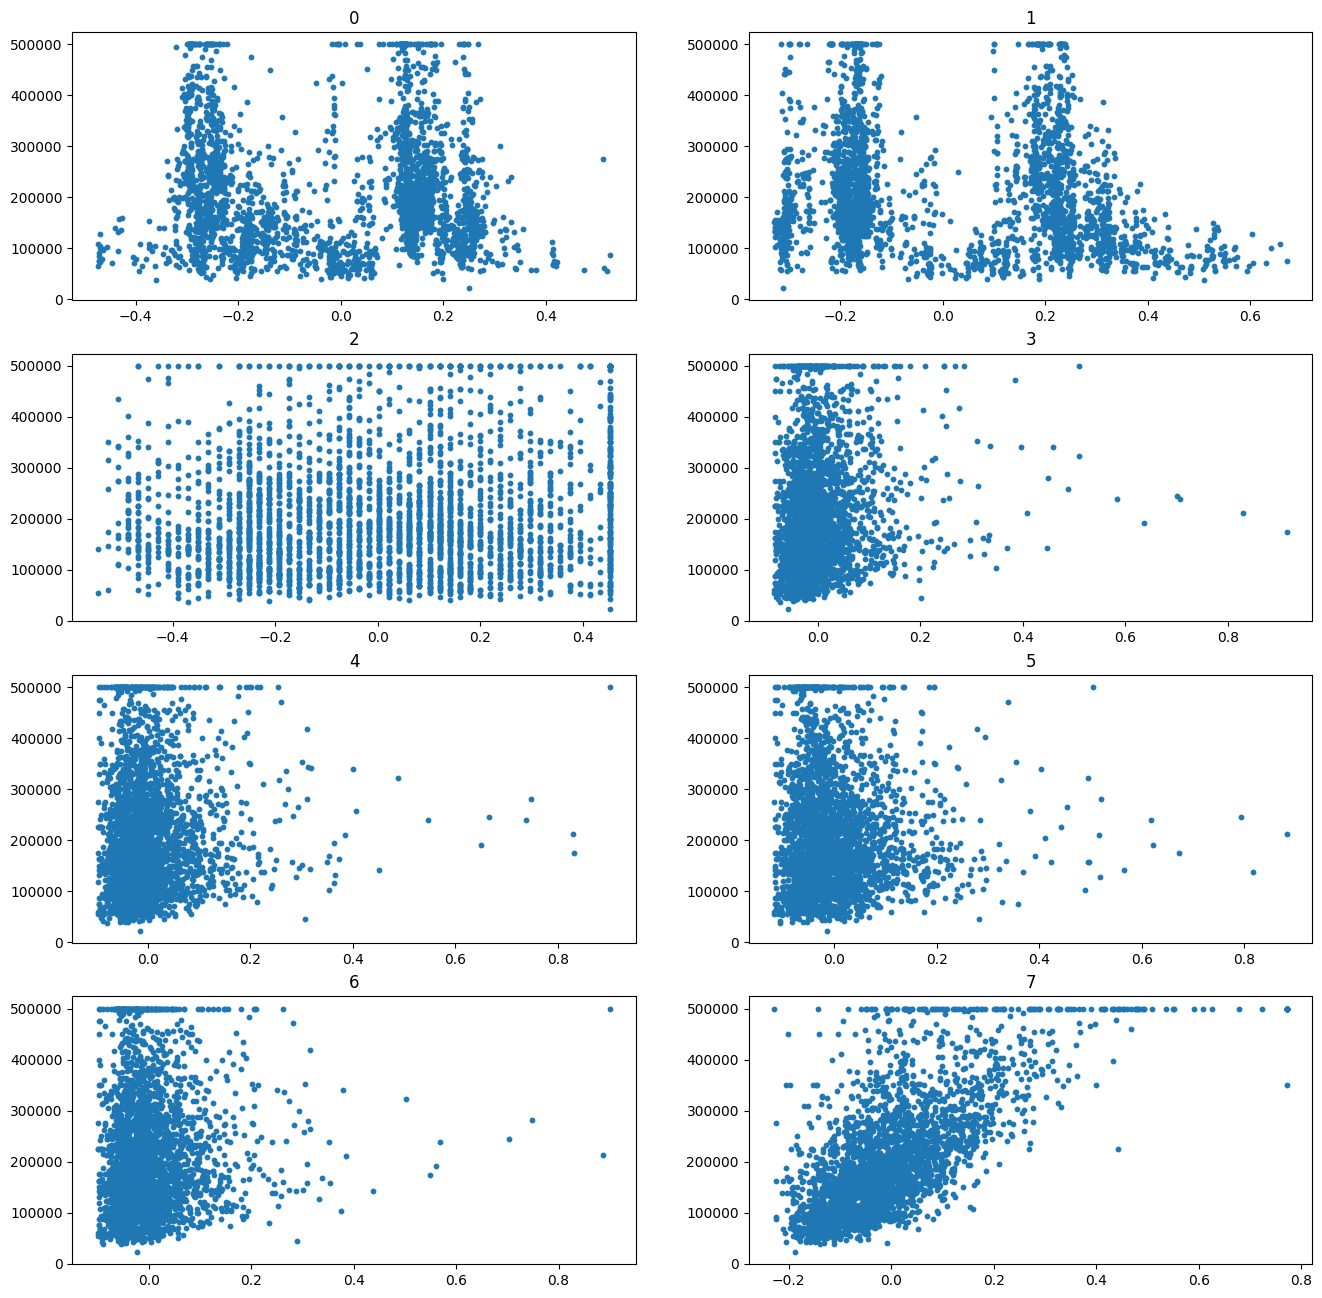

In [20]:
testData = pd.read_csv(TEST_DATA_PATH)
torder = list(range(testData.shape[0]))
tX, tY = np.array(testData[testData.columns[0:-1]]).T, np.array(testData[testData.columns[-1]]).reshape(1,-1)
# normaliziedtX = np.array([(x-np.mean(x))/(np.std(x)) for x in tX])
normaliziedtX = np.array([(x-np.mean(x))/(np.max(x)-np.min(x)) for x in tX])
np.random.shuffle(torder)
tfig, tax = plt.subplots(4, 2, figsize=(16, 16))
sn = 0
for j in range(4):
    for i in range(2):
        tax[j, i].scatter(x = normaliziedtX[sn][torder], y = tY[:,torder].flatten(), s=10)
        tax[j, i].set_title(f"{sn}")
        sn += 1
plt.show()

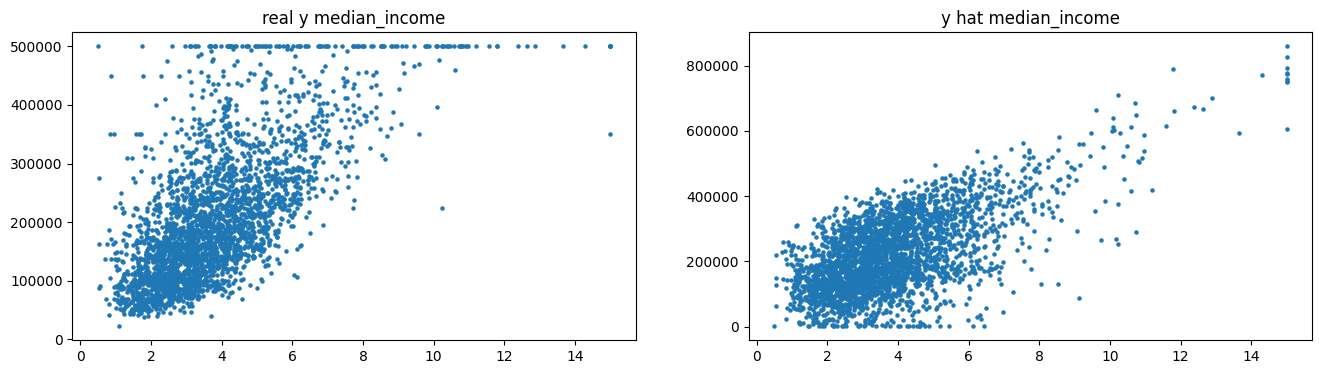

In [21]:
tY_hat = model.forward(normaliziedtX)[-1]
tYfig, tYax = plt.subplots(1, 2, figsize=(16, 4))
tYax[0].scatter(tX[7], tY, s=5)
tYax[0].set_title(f"real y {data.columns[7]}")
tYax[1].scatter(tX[7], tY_hat, s=5)
tYax[1].set_title(f"y hat {data.columns[7]}")
plt.show()

In [22]:
import math
tY_hat = model.predict(normaliziedtX)
math.sqrt((MeanSquaredError().compute(tY_hat, tY))), math.sqrt((MeanSquaredError().compute(tY_hat, tY)))/np.mean(tY)

(68950.61705313914, 0.334961694367018)